In [105]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [3]:
WHR = pd.read_csv("world-happiness-report-2021.csv")
eInvestment_dirty = pd.read_csv("educational investment.csv")

In [4]:
columns = eInvestment_dirty.iloc[3]
eInvestment_dirty.columns = columns 
eInvestment_dirty.head()

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,2021-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.00000,2013.00000,2014.00000,2015.00000,2016.00000,2017.0,2018.0,2019.0,2020.0,NaN
4,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.54906,6.50538,5.90521,5.97571,5.52415,NaN,NaN,NaN,NaN,NaN


In [5]:
eInvestment_semi = eInvestment_dirty.drop([0,1,2,3])
index = list(range(len(eInvestment_semi)))
eInvestment_semi = eInvestment_semi.reset_index()
eInvestment_semi = eInvestment_semi.drop(columns = "index") 
eInvestment_semi.head() 

3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,NaN
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.54906,6.50538,5.90521,5.97571,5.52415,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN,NaN,NaN,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN,NaN,NaN,NaN
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.50616,3.07421,3.28035,3.23707,3.21709,3.24672,3.15162,NaN,NaN


In [6]:
eInvestment_clean = eInvestment_semi[["Country Name","Country Code", "Indicator Name", "Indicator Code", 2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0]]
eInvestment_clean.columns.values[0] = "Country name"
eInvestment_clean.head()

3,Country name,Country Code,Indicator Name,Indicator Code,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,6.92927,6.11913,6.54906,6.50538,5.90521,5.97571,5.52415,NaN,NaN
1,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
2,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,3.42132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN
4,Andorra,AND,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,2.97663,2.98706,NaN,2.50616,3.07421,3.28035,3.23707,3.21709,3.24672


In [7]:
WHR.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [8]:
WHR = WHR.sort_values(by=["Country name"])
index = list(range(len(WHR)))
WHR = WHR.reset_index()
WHR = WHR.drop(columns = "index") 
WHR.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
1,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,-0.030,0.901,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250
2,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,-0.182,0.834,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,-0.168,0.629,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127


In [9]:
happy_dirty = WHR.merge(eInvestment_clean, how = 'left', on = 'Country name')
happy_dirty.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Indicator Code,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,SE.XPD.TOTL.GD.ZS,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
1,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,...,SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN
2,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,...,SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,SE.XPD.TOTL.GD.ZS,5.01971,5.29063,5.34583,5.43661,5.36144,5.77611,5.54549,5.46223,NaN
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,SE.XPD.TOTL.GD.ZS,3.24900,3.14385,2.77248,2.65018,2.24724,2.80591,2.75812,2.70759,NaN


In [10]:
happy_semi = happy_dirty.drop(columns = "Indicator Code")

In [11]:
happy_semi = happy_semi.drop(columns = "Indicator Name")

In [12]:
happy_semi.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Country Code,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,AFG,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
1,Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,...,ALB,NaN,NaN,NaN,3.53930,NaN,3.43797,3.96209,3.61172,NaN
2,Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,...,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,ARG,5.01971,5.29063,5.34583,5.43661,5.36144,5.77611,5.54549,5.46223,NaN
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,ARM,3.24900,3.14385,2.77248,2.65018,2.24724,2.80591,2.75812,2.70759,NaN


In [88]:
happy = happy_semi.dropna(subset= [2010.0,2011.0,2012.0,2013.0,2014.0,2015.0])

In [89]:
happy

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Country Code,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,AFG,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
3,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,ARG,5.01971,5.29063,5.34583,5.43661,5.36144,5.77611,5.54549,5.46223,NaN
4,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,ARM,3.24900,3.14385,2.77248,2.65018,2.24724,2.80591,2.75812,2.70759,NaN
5,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.900,0.914,...,AUS,5.55006,5.07451,4.86900,5.22974,5.16477,5.31127,5.27678,5.12425,NaN
6,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,...,AUT,5.70048,5.59227,5.48040,5.54711,5.44762,5.45658,5.48435,5.35804,NaN
7,Azerbaijan,Commonwealth of Independent States,5.171,0.040,5.250,5.091,9.569,0.836,65.656,0.814,...,AZE,2.78062,2.43564,2.06763,2.44213,2.63304,2.95168,2.90341,2.47382,2.45543
10,Belarus,Commonwealth of Independent States,5.534,0.047,5.625,5.442,9.853,0.910,66.253,0.650,...,BLR,5.22004,4.68479,4.95964,5.00942,4.81831,4.78752,4.94655,4.79499,NaN
16,Brazil,Latin America and Caribbean,6.330,0.043,6.415,6.245,9.577,0.882,66.601,0.804,...,BRA,5.64880,5.73741,5.85510,5.83885,5.94848,6.24106,6.31404,6.32255,NaN
18,Burkina Faso,Sub-Saharan Africa,4.834,0.081,4.993,4.675,7.678,0.672,54.151,0.695,...,BFA,3.50223,3.98515,3.60316,4.08344,4.05330,3.67009,NaN,5.60347,5.38379
19,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,...,BDI,6.77525,6.31925,6.16786,5.99536,6.78452,6.37054,4.69200,4.76202,5.07865


In [90]:
index = list(range(len(happy)))
happy = happy.reset_index()
happy = happy.drop(columns = "index") 
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Country Code,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,AFG,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580,4.22836,4.05887,NaN
1,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,ARG,5.01971,5.29063,5.34583,5.43661,5.36144,5.77611,5.54549,5.46223,NaN
2,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,ARM,3.24900,3.14385,2.77248,2.65018,2.24724,2.80591,2.75812,2.70759,NaN
3,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.900,0.914,...,AUS,5.55006,5.07451,4.86900,5.22974,5.16477,5.31127,5.27678,5.12425,NaN
4,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,...,AUT,5.70048,5.59227,5.48040,5.54711,5.44762,5.45658,5.48435,5.35804,NaN


In [95]:
happy = happy.drop(columns = 2017.0)
happy = happy.drop(columns = 2018.0)
happy

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Country Code,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,0.122,0.010,1.895,AFG,3.47945,3.46201,2.60420,3.45446,3.69522,3.25580
1,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,0.069,0.067,2.461,ARG,5.01971,5.29063,5.34583,5.43661,5.36144,5.77611
2,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,0.079,0.198,2.127,ARM,3.24900,3.14385,2.77248,2.65018,2.24724,2.80591
3,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.900,0.914,...,0.291,0.317,2.598,AUS,5.55006,5.07451,4.86900,5.22974,5.16477,5.31127
4,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,...,0.215,0.292,2.784,AUT,5.70048,5.59227,5.48040,5.54711,5.44762,5.45658
5,Azerbaijan,Commonwealth of Independent States,5.171,0.040,5.250,5.091,9.569,0.836,65.656,0.814,...,0.043,0.276,1.919,AZE,2.78062,2.43564,2.06763,2.44213,2.63304,2.95168
6,Belarus,Commonwealth of Independent States,5.534,0.047,5.625,5.442,9.853,0.910,66.253,0.650,...,0.070,0.199,2.247,BLR,5.22004,4.68479,4.95964,5.00942,4.81831,4.78752
7,Brazil,Latin America and Caribbean,6.330,0.043,6.415,6.245,9.577,0.882,66.601,0.804,...,0.142,0.117,3.015,BRA,5.64880,5.73741,5.85510,5.83885,5.94848,6.24106
8,Burkina Faso,Sub-Saharan Africa,4.834,0.081,4.993,4.675,7.678,0.672,54.151,0.695,...,0.182,0.122,3.133,BFA,3.50223,3.98515,3.60316,4.08344,4.05330,3.67009
9,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,...,0.172,0.212,2.876,BDI,6.77525,6.31925,6.16786,5.99536,6.78452,6.37054


In [96]:
d = pd.melt(happy, id_vars=['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Country Code'], value_vars=[2010,2011,2012,2013,2014,2015], var_name='Year',value_name='% of GDP on Education')
d

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Country Code,Year,% of GDP on Education
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,0.370,0.000,0.126,0.000,0.122,0.010,1.895,AFG,2010,3.47945
1,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,1.162,0.980,0.646,0.544,0.069,0.067,2.461,ARG,2010,5.01971
2,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,0.996,0.758,0.585,0.540,0.079,0.198,2.127,ARM,2010,3.24900
3,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.900,0.914,...,1.453,1.076,0.801,0.647,0.291,0.317,2.598,AUS,2010,5.55006
4,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,...,1.492,1.062,0.782,0.640,0.215,0.292,2.784,AUT,2010,5.70048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Sri Lanka,South Asia,4.325,0.066,4.454,4.196,9.470,0.827,67.299,0.841,...,0.990,0.820,0.593,0.559,0.239,0.049,1.075,LKA,2015,2.22875
350,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.700,0.945,...,1.478,1.062,0.763,0.685,0.244,0.448,2.683,SWE,2015,7.44390
351,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,1.566,1.079,0.816,0.653,0.204,0.413,2.839,CHE,2015,5.10057
352,Togo,Sub-Saharan Africa,4.107,0.077,4.258,3.956,7.362,0.569,54.914,0.619,...,0.254,0.239,0.203,0.289,0.209,0.107,2.806,TGO,2015,5.10860


In [110]:
d.columns[23]

'dummy'

In [114]:
d["dummy"] = 0 
for i in range(len(d)):
    if(d.iloc[i,2] > 6):
        d.iloc[i,23] = 1
d

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Country Code,Year,% of GDP on Education,dummy
0,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,0.000,0.126,0.000,0.122,0.010,1.895,AFG,2010,3.47945,0
1,Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,...,0.980,0.646,0.544,0.069,0.067,2.461,ARG,2010,5.01971,0
2,Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,...,0.758,0.585,0.540,0.079,0.198,2.127,ARM,2010,3.24900,0
3,Australia,North America and ANZ,7.183,0.041,7.265,7.102,10.796,0.940,73.900,0.914,...,1.076,0.801,0.647,0.291,0.317,2.598,AUS,2010,5.55006,1
4,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.300,0.908,...,1.062,0.782,0.640,0.215,0.292,2.784,AUT,2010,5.70048,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Sri Lanka,South Asia,4.325,0.066,4.454,4.196,9.470,0.827,67.299,0.841,...,0.820,0.593,0.559,0.239,0.049,1.075,LKA,2015,2.22875,0
350,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.700,0.945,...,1.062,0.763,0.685,0.244,0.448,2.683,SWE,2015,7.44390,1
351,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,1.079,0.816,0.653,0.204,0.413,2.839,CHE,2015,5.10057,1
352,Togo,Sub-Saharan Africa,4.107,0.077,4.258,3.956,7.362,0.569,54.914,0.619,...,0.239,0.203,0.289,0.209,0.107,2.806,TGO,2015,5.10860,0


In [119]:
x = d[["% of GDP on Education"]]
y = d["Ladder score"]
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size = .25)
reg = LinearRegression()
reg.fit(x_tr,y_tr)
print("Test Group Score (R^2):", reg.score(x_te,y_te))
print("Training Group Score (R^2):", reg.score(x_tr,y_tr))
predict = reg.predict(x)
mse = mean_squared_error(y,predict)
print("Mean Squared Error:", mse)

Test Group Score (R^2): 0.34757599727110944
Training Group Score (R^2): 0.2535399858655406
Mean Squared Error: 0.916230335775574


<function matplotlib.pyplot.show(*args, **kw)>

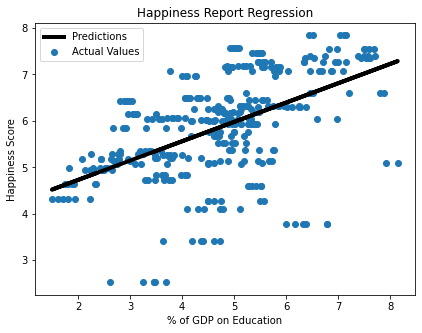

In [120]:
plt.subplots(figsize=(15, 5))
plt.subplot(121)
plt.scatter(x,y)
plt.plot(x, predict, 'k', linewidth=4)
plt.legend(["Predictions","Actual Values"])
plt.title("Happiness Report Regression")
plt.xlabel("% of GDP on Education")
plt.ylabel("Happiness Score")
plt.show

Text(0, 0.5, 'Happiness Score (out of 10)')

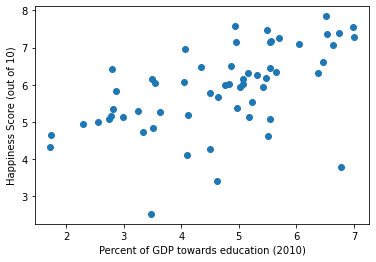

In [87]:
plt.scatter(x=happy[2010.0],y=happy["Ladder score"])
plt.xlabel("Percent of GDP towards education (2010)")
plt.ylabel("Happiness Score (out of 10)")

Text(0, 0.5, 'Happiness Score (out of 10)')

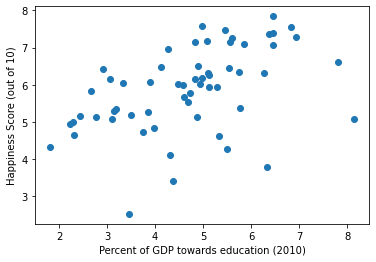

In [88]:
plt.scatter(x=happy[2011.0],y=happy["Ladder score"])
plt.xlabel("Percent of GDP towards education (2011)")
plt.ylabel("Happiness Score (out of 10)")

Text(0, 0.5, 'Happiness Score (out of 10)')

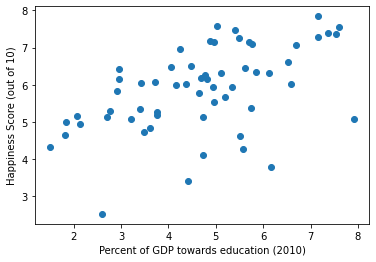

In [90]:
plt.scatter(x=happy[2012.0],y=happy["Ladder score"])
plt.xlabel("Percent of GDP towards education (2012)")
plt.ylabel("Happiness Score (out of 10)")

Text(0, 0.5, 'Happiness Score (out of 10)')

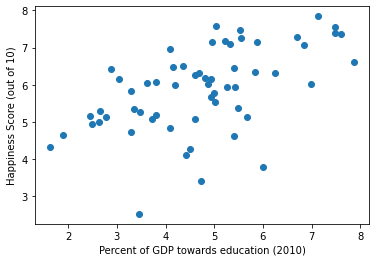

In [91]:
plt.scatter(x=happy[2013.0],y=happy["Ladder score"])
plt.xlabel("Percent of GDP towards education (2013)")
plt.ylabel("Happiness Score (out of 10)")

Text(0, 0.5, 'Happiness Score (out of 10)')

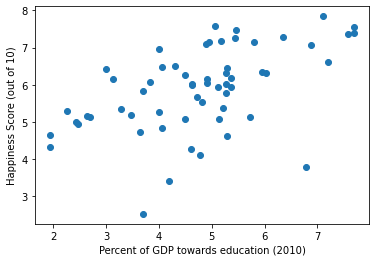

In [92]:
plt.scatter(x=happy[2014.0],y=happy["Ladder score"])
plt.xlabel("Percent of GDP towards education (2014)")
plt.ylabel("Happiness Score (out of 10)")

Text(0, 0.5, 'Happiness Score (out of 10)')

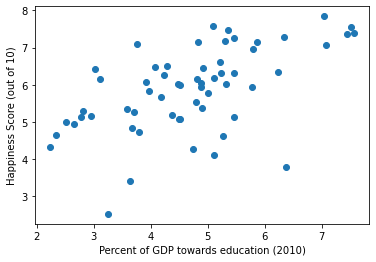

In [93]:
plt.scatter(x=happy[2015.0],y=happy["Ladder score"])
plt.xlabel("Percent of GDP towards education (2015)")
plt.ylabel("Happiness Score (out of 10)")

Text(0, 0.5, 'Happiness Score (out of 10)')

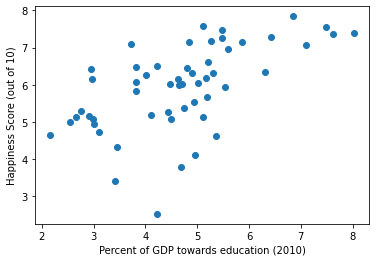

In [94]:
plt.scatter(x=happy[2016.0],y=happy["Ladder score"])
plt.xlabel("Percent of GDP towards education (2016)")
plt.ylabel("Happiness Score (out of 10)")

Text(0, 0.5, 'Happiness Score (out of 10)')

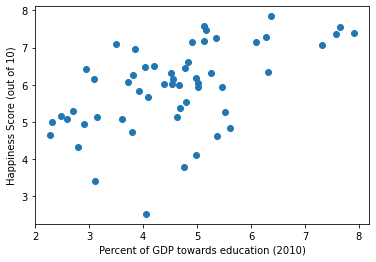

In [95]:
plt.scatter(x=happy[2017.0],y=happy["Ladder score"])
plt.xlabel("Percent of GDP towards education (2017)")
plt.ylabel("Happiness Score (out of 10)")